# Gradient Boosting

O Gradient Boosting é uma técnica de aprendizado de máquina baseada em ensemble que constrói um modelo preditivo forte a partir de uma coleção de modelos preditivos fracos. A ideia central é combinar vários estimadores simples (geralmente árvores de decisão rasas) sequencialmente, onde cada novo modelo é treinado para corrigir os erros do modelo anterior.

## Funcionamento:
- **Inicialização:** Inicialmente, o algoritmo ajusta um modelo simples aos dados de treinamento. Isso pode ser um modelo constante (por exemplo, a média das respostas) ou um modelo simples, como uma árvore de decisão com poucas divisões.

- **Iteração:** Em cada iteração subsequente, o algoritmo ajusta um novo modelo para os resíduos (diferença entre as previsões atuais e os rótulos verdadeiros) do modelo anterior. O objetivo é minimizar os resíduos residuais.

- **Combinação de Modelos:** Os modelos são combinados aditivamente, o que significa que as previsões finais são obtidas somando as previsões de todos os modelos individuais.

## Gradiente Descendente:
O termo "gradiente" em Gradient Boosting refere-se ao uso do gradiente da função de perda (loss function) em relação às previsões do modelo. O algoritmo ajusta cada modelo subsequente na direção do gradiente negativo da função de perda, tentando reduzir a perda global.

## Regularização:
Para evitar overfitting, é comum aplicar regularização durante o treinamento do Gradient Boosting. Isso pode ser feito limitando o número de iterações (número de modelos no ensemble), ajustando a taxa de aprendizado (learning rate) ou usando árvores de decisão rasas (evitando árvores profundas que podem se ajustar muito bem aos dados de treinamento).

## Implementação no scikit-learn:
O GradientBoostingClassifier do scikit-learn é uma implementação eficiente e fácil de usar do Gradient Boosting para tarefas de classificação. Ele permite configurar diversos hiperparâmetros, como o número de estimadores (número de modelos no ensemble), a profundidade máxima das árvores de decisão, a taxa de aprendizado, entre outros.

## Vantagens:
- **Poder Preditivo:** O Gradient Boosting geralmente produz modelos com alta precisão devido à sua capacidade de ajustar modelos complexos.

- **Flexibilidade:** Pode ser aplicado a uma variedade de problemas de aprendizado supervisionado e é robusto a outliers e ruído nos dados.

## Limitações:
- **Sensibilidade a Hiperparâmetros:** O desempenho do Gradient Boosting pode depender fortemente da escolha dos hiperparâmetros, como a taxa de aprendizado e o número de estimadores.

- **Computacionalmente Intensivo:** Treinar um Gradient Boosting pode ser computacionalmente caro, especialmente com um grande número de estimadores.


Importando bibliotecas

In [1]:
import gsidiag as gd
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

from itertools import combinations
import seaborn as sns


Definindo parâmetros para o uso do readDiag

In [3]:
DIRdiag = "/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout"

varName = "amsua"
varType = "n15"
dateIni="2020010100" 
dateFin="2020010106" 
nHour = "6"          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = None           
SingleL = "All" 

datei = datetime.strptime(str(dateIni), "%Y%m%d%H")
datef = datetime.strptime(str(dateFin), "%Y%m%d%H")
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq="6H").tolist()]

print(dates)


['2020010100', '2020010106']


Encontrando e listando arquivos para serem usados

In [4]:
paths, pathsc = [], []

OuterL = "01"        
[paths.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterL+"."+dt) for dt in dates]

OuterLc = "03"
[pathsc.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterLc+"."+dt) for dt in dates]

print(paths)
print("")
print(pathsc)

['/home/patrick/readDiag/data/2020010100/diag_amsua_n15_01.2020010100', '/home/patrick/readDiag/data/2020010106/diag_amsua_n15_01.2020010106']

['/home/patrick/readDiag/data/2020010100/diag_amsua_n15_03.2020010100', '/home/patrick/readDiag/data/2020010106/diag_amsua_n15_03.2020010106']


Lendo arquivos listado usando o readDiag e concatenando os dados

In [5]:
# Define uma variável booleana 'read' como True para indicar que a leitura dos arquivos será realizada
read = True

# Verifica se 'read' é True para prosseguir com a leitura dos arquivos
if read:        
    # Inicializa uma lista vazia para armazenar os objetos gdf
    gdf_list = []
    # Imprime uma mensagem informando o tempo estimado necessário para a leitura dos arquivos
    print("")
    print("Aguarde, o tempo total estimado para a leitura dos arquivos é de "+
          str(int((float(len(paths))*20 )/60))+" minutos e "+
          str(int((float(len(paths))*20 )%60))+" segundos.")
    print("")
    # Itera sobre os caminhos dos arquivos e seus caminhos de configuração correspondentes
    for path, pathc in zip(paths,pathsc):
        # Imprime uma mensagem indicando o arquivo que está sendo lido
        print("Reading "+path)
        # Lê o arquivo usando a função read_diag do módulo gsidiag e armazena o objeto retornado em gdf
        gdf = gd.read_diag(path,pathc)
        # Adiciona o objeto gdf à lista gdf_list
        gdf_list.append(gdf)

    # Imprime a lista de objetos gdf lidos
    print(gdf_list)
    
    # Define uma string separadora para uso posterior
    separator = " ====================================================================================================="



Aguarde, o tempo total estimado para a leitura dos arquivos é de 0 minutos e 40 segundos.

Reading /home/patrick/readDiag/data/2020010100/diag_amsua_n15_01.2020010100
 
>>> GSI DIAG <<<
 
Reading /home/patrick/readDiag/data/2020010106/diag_amsua_n15_01.2020010106
 
>>> GSI DIAG <<<
 
[<gsidiag.__main__.read_diag object at 0x7fa7206b6190>, <gsidiag.__main__.read_diag object at 0x7fa72096e310>]


Definição da função para discretizar os dados de impacto:

In [6]:
# Função que retorna a categoria:
def categoria_de(valorRF):
    categoria = None
    if valorRF <= -0.25:
        categoria = "Impacto negativo alto"
    elif valorRF > -0.25 and valorRF < 0:
        categoria = "Impacto negativo baixo"
    elif valorRF == 0:
        categoria = "Impacto neutro"
    elif valorRF > 0 and valorRF < 0.25:
        categoria = "Impacto positivo baixo"
    elif valorRF >= 0.25:
        categoria = "Impacto positivo alto"
    return categoria

In [7]:
# Inicialização de DataFrame vazio para armazenar dados concatenados
df_concatenado2 = pd.DataFrame()

# Iteração sobre objetos em gdf_list
for objeto in gdf_list:
        
    print(separator)
    print("Separando dados do arquivo" + str(objeto._diagFile))
        
    # Criação de dicionário de dados a partir do objeto
    dados_dict = {
            'lat': objeto.obsInfo[varName].loc[varType].lat,
            'lon': objeto.obsInfo[varName].loc[varType].lon,
            'elev': objeto.obsInfo[varName].loc[varType].elev,
            'nchan': objeto.obsInfo[varName].loc[varType].nchan,
            'time': objeto.obsInfo[varName].loc[varType].time,
            'iuse': objeto.obsInfo[varName].loc[varType].iuse,
            'idqc': objeto.obsInfo[varName].loc[varType].idqc,
            'inverr': objeto.obsInfo[varName].loc[varType].inverr,
            'oer': objeto.obsInfo[varName].loc[varType].oer,
            'obs': objeto.obsInfo[varName].loc[varType].obs,
            'omf': objeto.obsInfo[varName].loc[varType].omf,
            'omf_nobc': objeto.obsInfo[varName].loc[varType].omf_nobc,
            'emiss': objeto.obsInfo[varName].loc[varType].emiss,
            'oma': objeto.obsInfo[varName].loc[varType].oma,
            'oma_nobc': objeto.obsInfo[varName].loc[varType].oma_nobc,
            'imp': objeto.obsInfo[varName].loc[varType].imp,
            'dfs': objeto.obsInfo[varName].loc[varType].dfs
            }
        
    # Conversão do dicionário em DataFrame
    df_objeto = pd.DataFrame(dados_dict)
        
    # Concatenação do DataFrame do objeto com o DataFrame concatenado
    df_concatenado2 = pd.concat([df_concatenado2, df_objeto], ignore_index=True)
    

Separando dados do arquivo/home/patrick/readDiag/data/2020010100/diag_amsua_n15_01.2020010100
Separando dados do arquivo/home/patrick/readDiag/data/2020010106/diag_amsua_n15_01.2020010106


In [8]:
# Remoção de linhas com valores NaN
df_concatenado2.dropna(inplace=True)
    
# Filtrando os canais sub-representados
df_concatenado2 = df_concatenado2[~df_concatenado2['nchan'].isin([1, 2, 3, 4, 5, 15])]

print(df_concatenado2)

print(separator)
    
# Lista de atributos a serem usados para treinamento
atributos = ['nchan','omf', 'oma']

# Define as classes para a matriz de confusão
classes = ['6','7','8','9','10','12','13']

# Divisão dos dados em conjuntos de treinamento e teste
X = df_concatenado2[atributos]
y = df_concatenado2['position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
print('Treino e Teste prontos')
print(separator)

              lat         lon         elev  nchan      time  iuse  idqc  \
5      -87.504501   19.704599  2735.045410    6.0  0.315833  -1.0  -0.0   
6      -87.504501   19.704599  2735.045410    7.0  0.315833   1.0   0.0   
7      -87.504501   19.704599  2735.045410    8.0  0.315833   1.0   0.0   
8      -87.504501   19.704599  2735.045410    9.0  0.315833   1.0   0.0   
9      -87.504501   19.704599  2735.045410   10.0  0.315833   1.0   0.0   
...           ...         ...          ...    ...       ...   ...   ...   
209947  77.502502  358.795105    -0.108379    8.0  1.952778   1.0   0.0   
209948  77.502502  358.795105    -0.108379    9.0  1.952778   1.0   0.0   
209949  77.502502  358.795105    -0.108379   10.0  1.952778   1.0   0.0   
209951  77.502502  358.795105    -0.108379   12.0  1.952778   1.0   0.0   
209952  77.502502  358.795105    -0.108379   13.0  1.952778   1.0   0.0   

          inverr       oer         obs       omf  omf_nobc     emiss  \
5       3.557238  0.281441 

Acurácia: 0.24498559832416864
Matriz de Confusão:
[[511 645 555 296 188  51  10]
 [423 964 824 394 165  25   9]
 [426 842 930 422 201  19   7]
 [397 570 727 573 499  52  25]
 [378 447 581 598 697  84  43]
 [379 359 502 169 447 511 374]
 [417 441 640  90 268 428 492]]


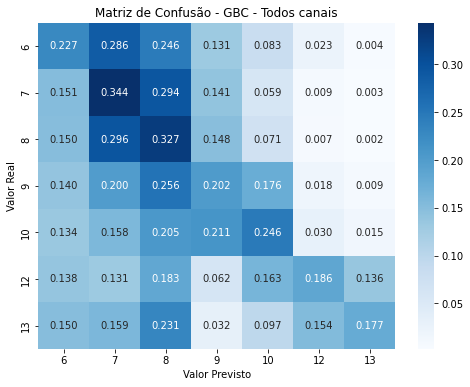


Relatório de Classificação:
              precision    recall  f1-score   support

         6.0       0.17      0.23      0.20      2256
         7.0       0.23      0.34      0.27      2804
         8.0       0.20      0.33      0.24      2847
         9.0       0.23      0.20      0.21      2843
        10.0       0.28      0.25      0.26      2828
        12.0       0.44      0.19      0.26      2741
        13.0       0.51      0.18      0.26      2776

    accuracy                           0.24     19095
   macro avg       0.29      0.24      0.25     19095
weighted avg       0.30      0.24      0.25     19095



In [9]:
# Inicializa e treina o classificador GradientBoostingClassifier com os parâmetros especificados
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=5, random_state=0).fit(X_train, y_train)

# Faz previsões usando o classificador treinado
y_pred = clf.predict(X_test)

# Calcula e imprime a acurácia do modelo
score = clf.score(X_test, y_test)
print("Acurácia:", score)

# Computa a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Imprime a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)

# Calcula a soma de cada linha da matriz de confusão
sum_by_class = np.sum(matriz_confusao, axis=1)

# Normaliza a matriz de confusão
matriz_confusao_normalized = matriz_confusao / sum_by_class[:, np.newaxis]

# Plota a matriz de confusão normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_normalized, annot=True, fmt=".3f", 
            cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Matriz de Confusão - GBC - Todos canais")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.savefig("MatrizConfusao_All_Ch.png", facecolor='white')
plt.show()

# Gera e imprime o relatório de classificação, que inclui métricas como precisão, recall e F1-score
relatorio_classificacao = classification_report(y_test, y_pred)
print(f"\nRelatório de Classificação:")
print(relatorio_classificacao)


In [10]:
# Lista de atributos a serem usados para treinamento
atributos = ['lat','lon','elev','time','iuse',
             'idqc','inverr','oer','obs','omf','omf_nobc',
             'emiss','oma','oma_nobc','imp','dfs']


# Define as classes para a matriz de confusão
classes = ['6','7','8','9','10','12','13']

# Divisão dos dados em conjuntos de treinamento e teste
X = df_concatenado2[atributos]
y = df_concatenado2['nchan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
print('Treino e Teste prontos')
print(separator)

Treino e Teste prontos


Acurácia: 0.9999476302697041
Matriz de Confusão:
[[2255    0    0    0    1    0    0]
 [   0 2804    0    0    0    0    0]
 [   0    0 2847    0    0    0    0]
 [   0    0    0 2843    0    0    0]
 [   0    0    0    0 2828    0    0]
 [   0    0    0    0    0 2741    0]
 [   0    0    0    0    0    0 2776]]


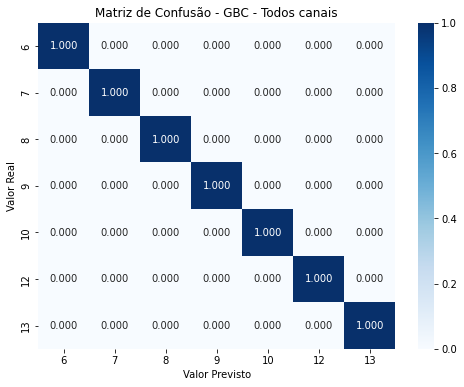


Relatório de Classificação:
              precision    recall  f1-score   support

         6.0       1.00      1.00      1.00      2256
         7.0       1.00      1.00      1.00      2804
         8.0       1.00      1.00      1.00      2847
         9.0       1.00      1.00      1.00      2843
        10.0       1.00      1.00      1.00      2828
        12.0       1.00      1.00      1.00      2741
        13.0       1.00      1.00      1.00      2776

    accuracy                           1.00     19095
   macro avg       1.00      1.00      1.00     19095
weighted avg       1.00      1.00      1.00     19095



In [11]:
# Inicializa e treina o classificador GradientBoostingClassifier com os parâmetros especificados
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=5, random_state=0).fit(X_train, y_train)

# Faz previsões usando o classificador treinado
y_pred = clf.predict(X_test)

# Calcula e imprime a acurácia do modelo
score = clf.score(X_test, y_test)
print("Acurácia:", score)

# Computa a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Imprime a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)

# Calcula a soma de cada linha da matriz de confusão
sum_by_class = np.sum(matriz_confusao, axis=1)

# Normaliza a matriz de confusão
matriz_confusao_normalized = matriz_confusao / sum_by_class[:, np.newaxis]

# Plota a matriz de confusão normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_normalized, annot=True, fmt=".3f", 
            cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Matriz de Confusão - GBC - Todos canais")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.savefig("MatrizConfusao_All_Ch.png", facecolor='white')
plt.show()

# Gera e imprime o relatório de classificação, que inclui métricas como precisão, recall e F1-score
relatorio_classificacao = classification_report(y_test, y_pred)
print(f"\nRelatório de Classificação:")
print(relatorio_classificacao)
